## SMOT(Synthetic Minority Oversampling techniques)

In [2]:
from sklearn.datasets import make_classification

In [4]:
# x is independent feature and y is dependent feature
x,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=1,n_redundant=0 )

In [5]:
x.shape

(1000, 2)

In [6]:
y.shape

(1000,)

In [7]:
import pandas as pd

In [9]:
df1=pd.DataFrame(x,columns=['f1','f2'])

In [11]:
df2=pd.DataFrame(y,columns=['target'])

In [20]:
df=pd.concat([df1,df2],axis=1).reset_index(drop=True)

In [21]:
df.shape

(1000, 3)

In [23]:
df['target'].value_counts()

target
0    894
1    106
Name: count, dtype: int64

In [18]:
df.describe()

,f1,f2,target
count,1000.000000,1000.000000,1000.000000
mean,0.981356,0.769076,0.106000
std,0.717083,0.871756,0.307992
min,-1.375885,-3.161205,0.000000
25%,0.496968,0.396181,0.000000
50%,0.960111,0.866533,0.000000
75%,1.459200,1.330996,0.000000
max,3.177921,2.943595,1.000000


In [19]:
df.head()

,f1,f2,target
0,1.536830,-1.398694,NaN
1,1.551108,1.810329,NaN
2,1.293619,1.010946,NaN
3,1.119889,1.632518,NaN
4,1.042356,1.121529,NaN


In [24]:
import matplotlib.pyplot as plt

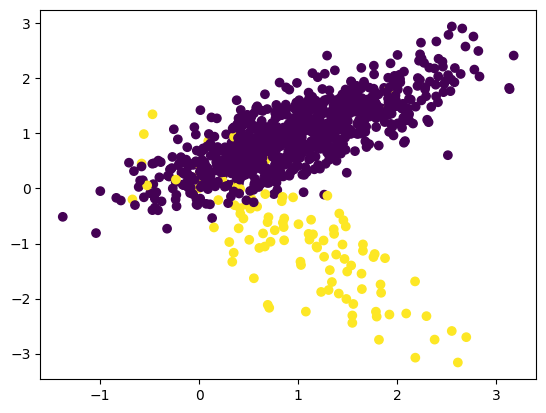

In [28]:
plt.scatter(df['f1'],df['f2'],c=df['target'])

In [30]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.0 kB 435.7 kB/s eta 0:00:01
   ---------- ---------------------------- 71.7/258.0 kB 563.7 kB/s eta 0:00:01
   ---------------------------------------  256.0/258.0 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 1.4 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from imblearn.over_sampling import SMOTE as smt

In [33]:
## transfer the dataset
oversample=smt()

In [36]:
x,y=oversample.fit_resample(df[['f1','f2']],df['target'])

In [37]:
x

,f1,f2
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
1783,1.576563,-1.455392
1784,1.754507,-1.230479
1785,0.862060,-0.699077
1786,0.382630,0.027441


In [38]:
y

0       1
1       0
2       0
3       0
4       0
       ..
1783    1
1784    1
1785    1
1786    1
1787    1
Name: target, Length: 1788, dtype: int32

In [39]:
x.shape

(1788, 2)

In [40]:
y.shape

(1788,)

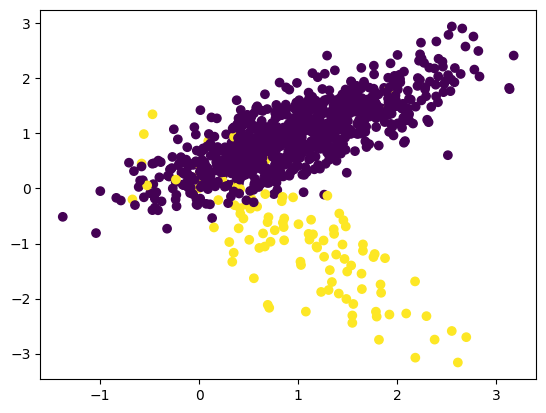

In [41]:
plt.scatter(df['f1'],df['f2'],c=df['target'])

In [42]:
len(y[y==0])

894

In [43]:
len(y[y==1])

894

In [44]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_data=pd.concat([df1,df2],axis=1).reset_index(drop=True)

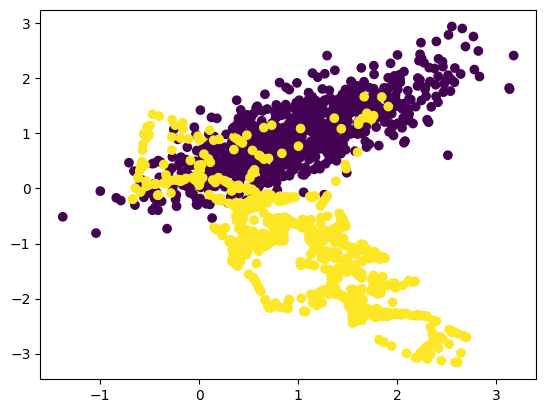

In [45]:
plt.scatter(oversample_data['f1'],oversample_data['f2'],c=oversample_data['target'])